In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('salary_and_other_data_cleaned.csv')

In [22]:
df. head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,"Senior Data Scientist , Advanced Analytics",$123K-$199K (Glassdoor est.),Senior Data Scientist\nRaytheon Missiles & Def...,3.8,Raytheon Missiles & Defense\n3.8,"Andover, MA",-1,-1,-1,-1,...,199,161.0,Raytheon Missiles & Defense\n,MA,-1,1,0,0,1,0
1,Data Scientist 2,$52K-$95K (Glassdoor est.),Description\nDigital Health and Analytics with...,3.9,Raytheon Missiles & Defense\n3.8,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,...,95,73.5,Raytheon Missiles & Defense\n,KY,59,1,0,1,0,0
2,Senior Data Engineer,$67K-$127K (Glassdoor est.),Join our team dedicated to developing and exec...,4.6,Novetta\n4.6,"Reston, VA",501 to 1000 Employees,2012,Company - Private,Enterprise Software & Network Solutions,...,127,97.0,Novetta\n,VA,8,1,0,1,1,1
3,Research Scientist/ Senior Research Scientist,$88K-$167K (Glassdoor est.),Research Scientist/ Senior Research Scientist\...,4.2,AstraZeneca\n4.2,"Gaithersburg, MD",10000+ Employees,1913,Company - Public,Biotech & Pharmaceuticals,...,167,127.5,AstraZeneca\n,MD,107,0,0,0,0,1
4,Spark/Big Data Engineer,$52K-$101K (Glassdoor est.),The Data Consumption team of Decision Sciences...,3.5,GEICO\n3.5,"Chevy Chase, MD",10000+ Employees,1936,Subsidiary or Business Segment,Insurance Carriers,...,101,76.5,GEICO\n,MD,84,0,0,1,0,1


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [24]:
def title_simplification(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def senior(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'


In [25]:
df['job_simple'] = df['Job Title'].apply(title_simplification)

In [26]:
df['job_simple'].value_counts()

data scientist    141
analyst           101
na                 57
data engineer      36
mle                 6
manager             5
director            4
Name: job_simple, dtype: int64

In [27]:
df['seniority'] = df['Job Title'].apply(senior)
df['seniority'].value_counts()

na        270
senior     78
jr          2
Name: seniority, dtype: int64

In [28]:
df['job_state'].value_counts()

 CA    34
 VA    31
 MD    30
 NY    28
 MA    27
 TX    20
 FL    19
 GA    17
 UT    13
 NJ    13
 PA    12
 WI    10
 IN     8
 MO     8
 IL     8
 CO     8
 WA     7
 NM     7
 NC     6
 DC     6
 OH     4
 MI     4
 AR     3
 NE     3
 AZ     3
 ME     3
 CT     3
 KY     3
 TN     2
 OK     2
 AL     2
 IA     2
 MS     1
 ID     1
 SC     1
 LA     1
Name: job_state, dtype: int64

In [29]:
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))


In [30]:
df['desc_length']

0      4627
1      3525
2      5999
3      5182
4      3982
       ... 
345    1610
346    6253
347    2940
348    3890
349    4761
Name: desc_length, Length: 350, dtype: int64

In [31]:
#hourly wage calculation
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [32]:
df['min_salary'].value_counts()

65    13
83    11
40    11
67     9
72     9
      ..
86     1
82     1
78     1
73     1
17     1
Name: min_salary, Length: 99, dtype: int64

In [33]:
df[df.hourly == 1][['hourly','min_salary', 'max_salary']]

,hourly,min_salary,max_salary
65,1,30,52
70,1,34,48
138,1,28,60
200,1,28,40
211,1,28,60
253,1,122,230


In [34]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n',''))

In [35]:
df['company_txt']

0            Raytheon Missiles & Defense
1            Raytheon Missiles & Defense
2                                Novetta
3                            AstraZeneca
4                                  GEICO
                     ...                
345                            ERT, Inc.
346                           Guidehouse
347    TTI Floor Care North America Inc.
348                            Perspecta
349                            Perspecta
Name: company_txt, Length: 350, dtype: object

In [36]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_length
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000
mean,3.748286,1868.380000,0.017143,0.005714,68.931429,117.568571,92.707143,41.854286,0.554286,0.0,0.177143,0.254286,0.582857,4274.865714
std,0.502355,450.367359,0.129989,0.075485,26.456233,39.560691,32.839770,42.028424,0.497756,0.0,0.382336,0.436082,0.493793,1882.214159
min,2.000000,-1.000000,0.000000,0.000000,17.000000,40.000000,17.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,839.000000
25%,3.400000,1947.000000,0.000000,0.000000,47.000000,87.250000,66.250000,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,3119.000000
50%,3.800000,1986.000000,0.000000,0.000000,65.500000,112.000000,89.000000,25.500000,1.000000,0.0,0.000000,0.000000,1.000000,4023.500000
75%,4.075000,2005.000000,0.000000,0.000000,88.000000,144.000000,116.000000,58.500000,1.000000,0.0,0.000000,1.000000,1.000000,5067.500000
max,4.900000,2020.000000,1.000000,1.000000,144.000000,235.000000,187.500000,190.000000,1.000000,0.0,1.000000,1.000000,1.000000,16050.000000


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'desc_length'],
      dtype='object')

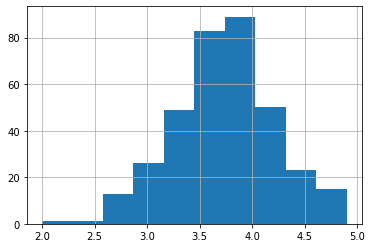

In [39]:
df.Rating.hist()

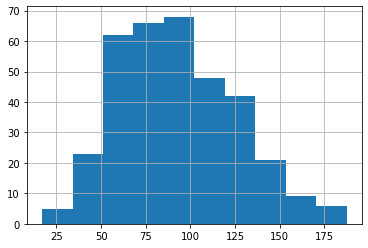

In [40]:
df.avg_salary.hist()

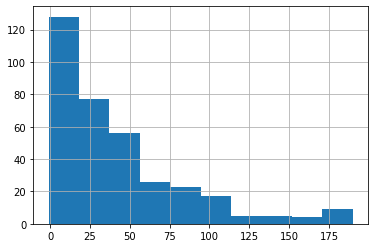

In [41]:
df.age.hist()

In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'desc_length'],
      dtype='object')

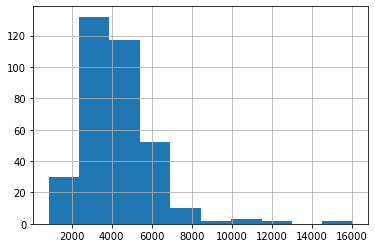

In [43]:
df.desc_length.hist()

In [44]:
df.avg_salary.boxplot(['min_salary, max_salary'])

AttributeError: 'Series' object has no attribute 'boxplot'

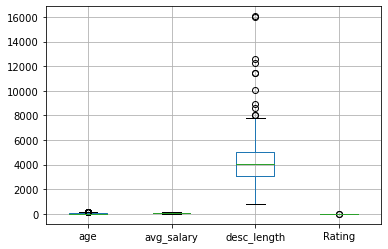

In [45]:
df.boxplot(['age','avg_salary','desc_length','Rating'])

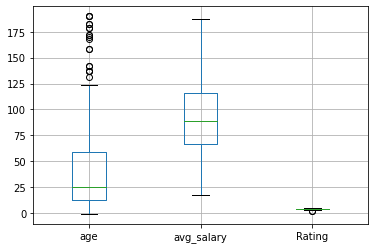

In [46]:
df.boxplot(['age','avg_salary','Rating'])

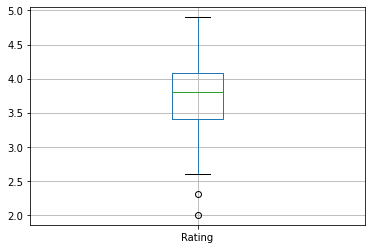

In [47]:
df.boxplot(['Rating'])